In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from WindPy import w
%matplotlib inline

In [6]:
w.start()

Welcome to use Wind Quant API for Python (WindPy)!

COPYRIGHT (C) 2017 WIND INFORMATION CO., LTD. ALL RIGHTS RESERVED.
IN NO CIRCUMSTANCE SHALL WIND BE RESPONSIBLE FOR ANY DAMAGES OR LOSSES CAUSED BY USING WIND QUANT API FOR Python.


.ErrorCode=0
.Data=[OK!]

In [2]:
df = pd.read_excel('D:/workspace/zjsxzy_in_js/website/everyday-update/data/industry_corr.xlsx')

In [4]:
df.head()

,corr,median
2006-01-05,0.830530,0.924829
2006-01-06,0.829606,0.923665
2006-01-09,0.828970,0.922185
2006-01-10,0.828215,0.921040
2006-01-11,0.827068,0.919802


In [7]:
df.tail()

,corr,median
2019-03-12,0.897574,0.957878
2019-03-13,0.896029,0.957025
2019-03-14,0.894751,0.955671
2019-03-15,0.893611,0.954183
2019-03-18,0.892824,0.952473


In [12]:
data = w.wsd('881001.WI', 'close', '2006-01-05', '2019-03-18')

In [13]:
wdf = pd.DataFrame(np.array(data.Data).T, index=data.Times, columns=['close'])

In [29]:
wdf.index = pd.to_datetime(wdf.index)

[Text(1,0,'0.40'),
 Text(1,0,'0.50'),
 Text(1,0,'0.60'),
 Text(1,0,'0.70'),
 Text(1,0,'0.80'),
 Text(1,0,'0.90'),
 Text(1,0,'1.00'),
 Text(1,0,'1.10')]

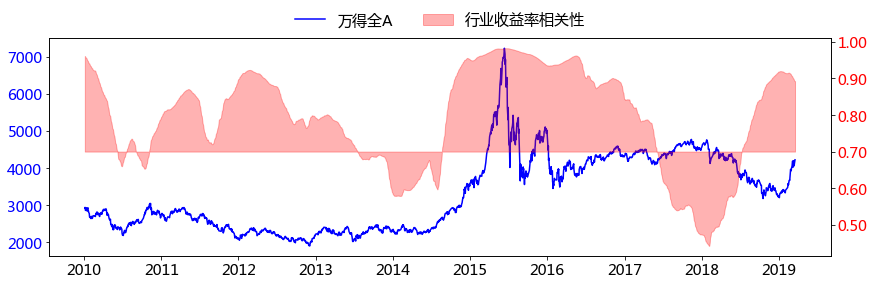

In [36]:
fig, ax = plt.subplots(figsize=(14, 4))

lns1 = ax.plot(wdf[wdf.index >= '2010-01-01']['close'], color='blue', label=u'万得全A')
axx = ax.twinx()
lns2 = axx.fill_between(df[df.index >= '2010-01-01'].index, 0.7, df[df.index >= '2010-01-01']['corr'], color='red', alpha=0.3, label=u'行业收益率相关性')

# Legend
lns = lns1 + [lns2]
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, frameon=False, fontsize=15, loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1.18))

# Axis
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
axx.yaxis.set_tick_params(labelsize=15)
vals = ax.get_yticks()
ax.set_yticklabels(['{:2.0f}'.format(x) for x in vals], color='blue')
vals = axx.get_yticks()
axx.set_yticklabels(['{:3.2f}'.format(x) for x in vals], color='red')